<blockquote>
    <h1>Exercise 3.8</h1>
    <p>This question involves the use of simple linear regression on the <code>Auto</code> data set.</p>
    <ol type="I">
        <li>
            Use the <code>lm()</code> function to perform a simple linear regression with $\mathrm{mpg}$ as the response and $\mathrm{horsepower}$ as the predictor. Use the <code>summary()</code> function to print the results. Comment on the output. For example:
            <ol>
                <li>Is there a relationship between the predictor and the response?</li>
                <li>How strong is the relationship between the predictor and the response?</li>
                <li>Is the relationship between the predictor and the response positive or negative?</li>
                <li>What is the predicted $\mathrm{mpg}$ associated with a $\mathrm{horsepower}$ of $98$? What are the associated $95 \%$ confidence and prediction intervals?</li>
            </ol>
        </li>
        <li>Plot the response and the predictor. Use the <code>abline()</code> function to display the least squares regression line.</li>
        <li>Use the <code>plot()</code> function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.</li>
    </ol>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
# from sklearn import preprocessing
import matplotlib.pyplot as plt

%run ../../customModules/usefulFunctions.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# https://markthegraph.blogspot.com/2015/05/using-python-statsmodels-for-ols-linear.html
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

<h2>Data Exploration</h2>
<p>We first read the comma-separated values (csv) <code>Auto</code> file into a pandas DataFrame, for which we will show the top five rows.</p>

In [2]:
df = pd.read_csv("../../DataSets/Auto/Auto.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<p>For this exercise, we are only interested in the $\mathrm{mpg}$ and $\mathrm{horsepower}$ variables. So we will <code>drop</code> all the other columns from the DataFrame, making use of our auxiliary <code>removeColumnsFromList()</code> function from the <a href="../../customModules/usefulFunctions.ipynb">usefulFunctions notebook</a>.</p>

In [3]:
df = df.set_index('name')
columnsToKeep = ['mpg','horsepower']
columnsToDrop = removeColumnsFromList(df, columnsToKeep)
df.drop(columnsToDrop, axis=1, inplace=True)
df.head()
df.shape

,mpg,horsepower
name,,
chevrolet chevelle malibu,18.0,130
buick skylark 320,15.0,165
plymouth satellite,18.0,150
amc rebel sst,16.0,150
ford torino,17.0,140


(397, 2)

<p>Furthermore, we know from our <a href="../../DataSets/Auto/Exploration.ipynb">Eploration notebook</a> for the <code>Auto</code> file that <code>horsepower</code> column contains $5$ missing values identified by the <code>'?'</code> string.</p>

In [4]:
df[df['horsepower'] == '?']

,mpg,horsepower
name,,
ford pinto,25.0,?
ford maverick,21.0,?
renault lecar deluxe,40.9,?
ford mustang cobra,23.6,?
renault 18i,34.5,?


<p>As explained in the <a href="../../DataSets/Auto/Exploration.ipynb">Eploration notebook</a>, we will <i>coercively</i> convert the <code>horsepower</code> column from an <code>object</code> type to a <code>numeric</code> type using pandas <code>to_numeric()</code> method. This will cause all the <code>'?'</code> strings to be converted to <code>NaN</code> values. Finally, we will use the <code>dropna()</code> method to remove the rows with missing values.</p>

In [5]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.dropna(inplace=True)
df.head()

,mpg,horsepower
name,,
chevrolet chevelle malibu,18.0,130.0
buick skylark 320,15.0,165.0
plymouth satellite,18.0,150.0
amc rebel sst,16.0,150.0
ford torino,17.0,140.0


<p>We also plot the scatter matrix of the two variable to quickly get some visual insight in the given data, with a histogram of each variable along the diagonal.</p>

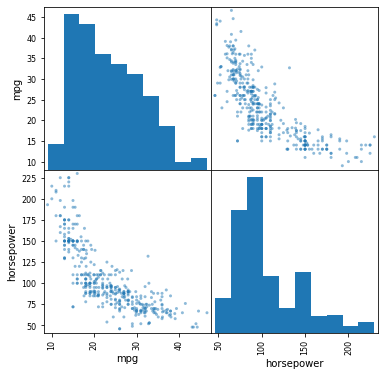

In [6]:
_ = pd.plotting.scatter_matrix(df, figsize=(6, 6))

<h3>Exercise 3.8.1</h3>
<blockquote>
    <i>Use the <code>lm()</code> function to perform a simple linear regression with $\mathrm{mpg}$ as the response and $\mathrm{horsepower}$ as the predictor. Use the <code>summary()</code> function to print the results. Comment on the output.</i>
</blockquote>

<p>We use the <code>statsmodels</code> library to produce these summary statistics.</p>

In [7]:
df['Intercept'] = 1 # We need to add the intercept term explicitly. Without with this step, the regression model would be: Y ~ X, rather than Y ~ X + c.
targetColumn = ['mpg']
descriptiveColumns = removeColumnsFromList(df, targetColumn)
X = df[descriptiveColumns]
Y = df[targetColumn]
model = sm.OLS(Y, X)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           7.03e-81
Time:                        01:08:29   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h5>Exercise 3.8.1A</h5>
<blockquote>
    <i>Is there a relationship between the predictor and the response?</i>
</blockquote>
<p>Assuming a linear model between the predictor and the response, that is,
$$
\mathrm{mpg} \approx \beta_0 + \beta_1 \mathrm{horsepower}  \,,
$$
the relationship between these variables is estimated by the slope coefficient $\hat{\beta}_1$ (displayed by the <b>x1</b> row in the output of the <code>summary</code> method). The corresponding $p$ value is extremely small, and so we can conclude that $\hat{\beta}_1 \neq 0$, i.e., there is a relation between the predictor and the response.</p>

<h5>Exercise 3.8.1B</h5>
<blockquote>
    <i>How strong is the relationship between the predictor and the response?</i>
</blockquote>
<p>The $R^2$ statistic measure of the the linear relationship between the predictor and the response, and the <code>summary</code> output shows that $R^2 = 0.606$. Thus, we see that the linear model can explain a substantial proportion of the relationship, but the model certainly can't explain everything. This might be because this linear assumption is significantly underfitting the data.
</p>

<h5>Exercise 3.8.1C</h5>
<blockquote>
    <i>Is the relationship between the predictor and the response positive or negative?</i>
</blockquote>
<p>Since $\hat{\beta}_1<0$ with a very small $p$ value, we conclude that the relationship is negative.</p>

<h5>Exercise 3.8.1D</h5>
<blockquote>
    <i>What is the predicted $\mathrm{mpg}$ associated with a $\mathrm{horsepower}$ of $98$? What are the associated $95 \%$ confidence and prediction intervals?</i>
</blockquote>
<p>To answer this question, we will use the <code>predict</code> method from <code>RegressionResults</code> object to get the predicted value. To calculate the prediction and confidence intervals, we use the <code>wls_prediction_std</code> and <code>get_prediction</code> methods.</p>

In [8]:
X_new = pd.DataFrame({
    'Intercept': [1], 
    'horsepower': [98]
}, columns = descriptiveColumns)
Y_new_pred = fitted.predict(X_new) # return a pandas Series
Y_new_pred.name = 'predicted mpg'
Y_new_pred

# get prediction intervals
[std_err_prediction_new, [lower_pred_int_new], [upper_pred_int_new]] = wls_prediction_std(fitted, exog=X_new, alpha=0.05)
# # get confidence intervals
result = fitted.get_prediction(X_new)
conf_int_new = result.conf_int()
conf_int_new[0][1]
lower_conf_int_new, upper_conf_int_new = conf_int_new[0]

f'lower_pred_int_new, upper_pred_int_new = ({lower_pred_int_new:.4f}, {upper_pred_int_new:.4f})'
f'lower_conf_int_new, upper_conf_int_new = ({lower_conf_int_new:.4f}, {upper_conf_int_new:.4f})'

0    24.467077
Name: predicted mpg, dtype: float64

24.9610753443209

'lower_pred_int_new, upper_pred_int_new = (14.8094, 34.1248)'

'lower_conf_int_new, upper_conf_int_new = (23.9731, 24.9611)'

<p>So the prediction for $\mathrm{mpg}$ on the basis that $\mathrm{horsepower}=98$ is calculated as
$$
\hat{\mathrm{mpg}} = \hat{\beta}_0 + \hat{\beta}_1 * \mathrm{horsepower} = 39.94 - 0.16 * 98 \approx 24.47 \,.
$$
At $\mathrm{horsepower}=98$, the $95 \%$ confidence interval of the theoretical mean of $\mathrm{mpg}$ is $[23.97, 24.96]$ and the $95 \%$ prediction interval of $\mathrm{mpg}$ is $[14.81, 34.12]$.</p>

<h3>Exercise 3.8.2</h3>
<blockquote>
    <i>Plot the response and the predictor. Use the <code>abline()</code> function to display the least squares regression line.</i>
</blockquote>

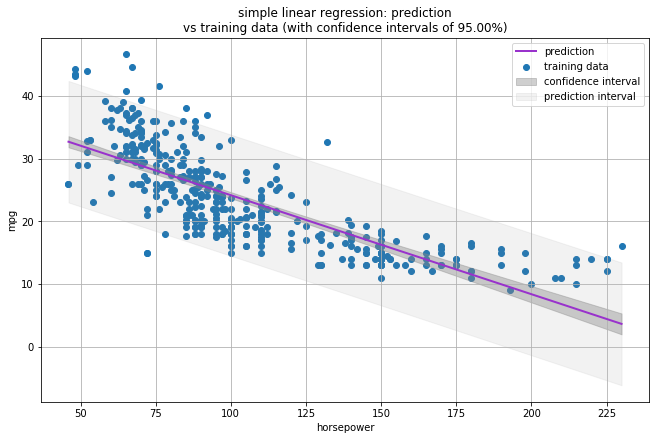

In [9]:
alpha = 0.05 # alpha=0.05 corresponds to 95% confidence
X_pred = np.linspace(start=X['horsepower'].min(), stop=X['horsepower'].max(), num=X.shape[0])
intercept = np.ones(X_pred.shape, dtype=int)
X_pred = pd.DataFrame({
    'Intercept': intercept, 
    'horsepower': X_pred
}, columns = descriptiveColumns)
Y_pred = fitted.predict(X_pred)
Y_pred.name = 'predicted mpg'
# get prediction intervals
std_err_prediction, lower_pred_int, upper_pred_int = wls_prediction_std(fitted, exog=X_pred, alpha=alpha)
# get confidence intervals
result = fitted.get_prediction(X_pred)
conf_int = result.conf_int()
lower_conf_int, upper_conf_int = conf_int[:, 0], conf_int[:, 1]

fig, ax = plt.subplots(constrained_layout=True, figsize=(9, 6))
_ = ax.scatter(X['horsepower'], Y, label='training data')
_ = ax.plot(X_pred['horsepower'], Y_pred, '-', color='darkorchid', linewidth=2, label='prediction')
_ = ax.fill_between(X_pred['horsepower'], lower_conf_int, upper_conf_int, color='#888888', alpha=0.4, label="confidence interval")
_ = ax.fill_between(X_pred['horsepower'], lower_pred_int, upper_pred_int, color='#888888', alpha=0.1, label="prediction interval")
_ = ax.legend()
_ = ax.set_xlabel('horsepower')
_ = ax.set_ylabel('mpg')
_ = ax.set_title(f'simple linear regression: prediction\nvs training data (with confidence intervals of {(1-alpha)*100:.2f}%)')
_ = ax.grid(True)

<h3>Exercise 3.8.3</h3>
<blockquote>
    <i>Use the <code>plot()</code> function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.</i>
</blockquote>
<p>We could easily reproduce these type of plots <a href="https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html">very closely</a>, with <a href="http://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html">additional regression diagnostics</a>, using the <code>statsmodels</code> library, however I would like to have more control, so I decided to plot most of them manually using <code>matplotlib</code>.

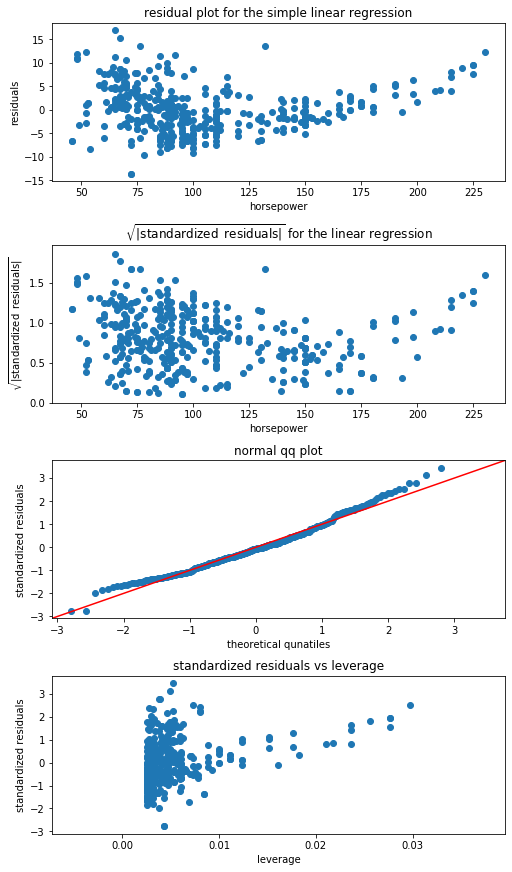

In [10]:
createResidualPlots(X, Y, descriptive=['horsepower'])

<p>The residual plots indicate that there is a non-linear structure in the data. The qq plot shows that the standardized residuals are approximately normally distributed. The leverage plot displays that there are no outlier present in the data, although horsepower does have some sample points with high leverage.</p>